## Model Parameters and State Representation

Let:
- $$N$$ be the number of MS loci
- $$r$$ be the exponential tumor growth rate (per year)
- $$\mu_i, \mu_d, \mu_s$$ be the insertion, deletion, and SNV rates per MS locus per cell division, respectively
- $$t_0, t_m, t_s$$ be the initial time point, time when exponential growth begins, and patient's age at sampling, respectively
- $$\Delta t$$ be the time step for discrete simulations

The state of the tumor at time $$t$$ is represented by:
- $$X(t)$$: total number of cells
- $$M_j(t) = [L_j(t), S_j(t)]$$: state of MS locus $$j$$, where $$L_j(t)$$ is the length and $$S_j(t)$$ is the number of SNVs

## Model Dynamics

1. Population Growth:
   $$X(t + \Delta t) = X(t) \cdot e^{r \Delta t}$$

2. Mutation Events:
   For each MS locus $$j$$ (1 ≤ j ≤ N) in each time step $$\Delta t$$:
   $$I_j \sim \text{Poisson}(X(t) \cdot \mu_i \cdot \Delta t)$$
   $$D_j \sim \text{Poisson}(X(t) \cdot \mu_d \cdot \Delta t)$$
   $$S_j \sim \text{Poisson}(X(t) \cdot \mu_s \cdot \Delta t)$$

3. State Update:
   $$L_j(t + \Delta t) = L_j(t) + I_j - D_j$$
   $$S_j(t + \Delta t) = S_j(t) + S_j$$


At time $$t = t_m^-$$, just before exponential growth begins:

1. Population size:
   $$X(t_m^-) = 1$$

2. For each MS locus j (1 ≤ j ≤ N):
   $$M_j(t_m^-) = [L_j(t_m^-), S_j(t_m^-)]$$

Where:

- $$L_j(t_m^-)$$ is the length of MS locus j at $$t_m^-$$
- $$S_j(t_m^-)$$ is the number of SNVs at MS locus j at $$t_m^-$$

These values are determined by the stochastic process of insertions, deletions, and SNVs occurring in a single cell from $$t_0$$ to $$t_m$$. The probability distribution of these states can be described by:

$$P(M_j(t_m^-) = [L, S]) = f_j(L, S | \mu_i, \mu_d, \mu_s, t_m - t_0)$$

Where $$f_j$$ is the probability density function for the state of locus j, which depends on the mutation rates and the time elapsed between $$t_0$$ and $$t_m$$.

This state serves as the initial condition for the exponential growth phase that begins at $$t = t_m$$.

## Stochastic Simulation Algorithm

1. Initialize $$X(t_0)$$ and $$M_j(t_0)$$ for all $$j$$
2. For $$t = t_0$$ to $$t_s$$ in steps of $$\Delta t$$:
   a. If $$t \geq t_m$$ : Update $$X(t + \Delta t) = X(t) . e^{r \Delta t}$$
   b. For each MS locus $$j$$
   Generate $$I_j, D_j, S_j$$
   Update $$M_j(t + \Delta t)$$
   c. Record $$X(t)$$ and $$M_j(t)$$ for all $$j$$

## Probability Distribution Estimation

To estimate the probability distribution of MS loci states:

1. Generate $$K$$ independent stochastic paths using the above algorithm.
2. For each locus $$j$$, create a 2D histogram of $$[L_j, S_j]$$ values across all $$K$$ paths.
3. Normalize the histogram to obtain an estimated probability mass function (PMF) $$P_j(L, S)$$.

## Likelihood Function

Let $$O_j$$ be the observed state of locus $$j$$ in a tumor sample. The likelihood function is:

$$L(\theta | O) = \prod_{j=1}^N P_j(O_j | \theta)$$

where $$\theta$$ represents the model parameters $$\{r, \mu_i, \mu_d, \mu_s, t_m\}$$.

The log-likelihood is:

$$\log L(\theta | O) = \sum_{j=1}^N \log P_j(O_j | \theta)$$

## Bias Correction

To account for the stochastic nature of the simulation, we apply a bias correction:

$$\log L_{\text{corrected}}(\theta | O) = \log L(\theta | O) + \frac{c}{K}$$

where $$c$$ is a constant estimated empirically.

## Sample Purity Consideration

To account for normal cell contamination, we introduce a purity parameter $$\rho$$:

$$O_j^{\text{measured}} = \rho O_j^{\text{tumor}} + (1-\rho) O_j^{\text{normal}}$$

where $$O_j^{\text{normal}}$$ represents the state of locus $$j$$ in normal cells.

## Extended Model for Testing MS Equilibrium

### Equilibrium Dynamics

Under equilibrium, the mutation rates satisfy:

$$\mu_i P(L - 1) = \mu_d P(L + 1)$$

for insertions and deletions at length $$L$$, and:

$$\mu_s P(S - 1) = \mu_s P(S + 1)$$

for SNVs.

### Likelihood Function for Model Comparison

1. Equilibrium Model:
   $$L_{\text{eq}}(\theta | O) = \prod_{j=1}^N P_{\text{eq}}(O_j | \theta)$$

2. Non-Equilibrium Model:
   $$L_{\text{non-eq}}(\theta | O) = \prod_{j=1}^N P_{\text{non-eq}}(O_j | \theta)$$

3. Log-Likelihood Comparison:
   - Equilibrium: $$LL_{\text{eq}} = \log L_{\text{eq}}(\theta | O)$$
   - Non-Equilibrium: $$LL_{\text{non-eq}} = \log L_{\text{non-eq}}(\theta | O) + c/K$$

### Statistical Test for Equilibrium

Likelihood Ratio Test (LRT):
$$LR = 2 (LL_{\text{non-eq}} - LL_{\text{eq}})$$

Under the null hypothesis (equilibrium), $$LR \sim \chi^2_k$$, where $$k = d_f(\text{non-eq}) - d_f(\text{eq})$$.


In [ ]:
np.exp(0.1*100)

22026.465794806718

In [ ]:
lengths = [0 for i in range(100)]

In [ ]:
import numpy as np
from scipy.stats import multinomial, binom
from tqdm import tqdm

class MicrosatelliteModel:
    def __init__(self, initial_lengths, num_loci=100, growth_rate=0.2, sim_time=35):
        self.num_loci = num_loci
        self.growth_rate = growth_rate
        self.sim_time = sim_time

        # Initialize locus-specific parameters
        self.initial_lengths = initial_lengths
        self.mu_i = np.random.uniform(0, 0.1, num_loci)
        self.mu_d = np.random.uniform(0.07, 0.15, num_loci)

        # Calculate delta_t
        self.delta_t = 0.1 / max(growth_rate, np.max(self.mu_i), np.max(self.mu_d))


        # Initialize state
        self.loci_states = [{'lengths': [l], 'counts': [1]} for l in self.initial_lengths]

    def simulate(self):
        time = 0

        total_iterations = int(self.sim_time / self.delta_t)

        # Create a tqdm progress bar
        # with tqdm(total=total_iterations, desc="Simulation Progress") as pbar:
        # time = 0
        while time < self.sim_time:
            self._step(time)
            time += self.delta_t
            # pbar.update(1)  # Update the progress bar

        return self._get_final_lengths()

    def _step(self, time):
        prev_cells = np.exp(self.growth_rate * (time - self.delta_t))
        curr_cells = np.exp(self.growth_rate * time)
        new_cells = int(curr_cells - prev_cells)

        for i in range(self.num_loci):
            self._update_locus(i, new_cells)

    def _update_locus(self, locus_idx, new_cells):
        state = self.loci_states[locus_idx]
        probs = np.array(state['counts']) / max(sum(state['counts']), 1)

        # Ensure probabilities are valid
        probs = np.nan_to_num(probs, nan=0.0)
        probs = np.clip(probs, 0, 1)
        probs /= max(probs.sum(), 1e-10)

        # Assign new cells
        new_counts = multinomial.rvs(n=new_cells, p=probs)
        state['counts'] = [max(c + n, 0) for c, n in zip(state['counts'], new_counts)]

        # Process insertions and deletions
        new_counts = state['counts'].copy()
        new_lengths = state['lengths'].copy()

        for idx, (length, count) in enumerate(zip(state['lengths'], state['counts'])):
            # Ensure count is non-negative
            count = max(count, 0)
            # print(count)
            # print(min(self.mu_i[locus_idx] * self.delta_t, 1))
            insertions = binom.rvs(count, max(0, min(self.mu_i[locus_idx] * self.delta_t, 1)))

            new_counts[idx] = max(new_counts[idx] - insertions, 0)
            if length + 1 in new_lengths:
                new_counts[new_lengths.index(length + 1)] += insertions
            else:
                new_lengths.append(length + 1)
                new_counts.append(insertions)

            # Deletions
            # if length > 0:
              # print(min(self.mu_d[locus_idx] * self.delta_t, 1))
            deletions = binom.rvs(count - insertions, max(0, min(self.mu_d[locus_idx] * self.delta_t, 1)))

            new_counts[idx] = max(new_counts[idx] - deletions, 0)
            if length - 1 in new_lengths:
                new_counts[new_lengths.index(length - 1)] += deletions
            else:
                new_lengths.append(length - 1)
                new_counts.append(deletions)

        # Update state
        state['lengths'] = new_lengths
        state['counts'] = [max(c, 0) for c in new_counts]  # Ensure all counts are non-negative

        # Remove any states with zero counts
        state['lengths'], state['counts'] = zip(*[(l, c) for l, c in zip(state['lengths'], state['counts']) if c > 0])
        state['lengths'] = list(state['lengths'])
        state['counts'] = list(state['counts'])


    def _get_final_lengths(self):
        final_lengths = []
        for state in self.loci_states:
            lengths = np.array(state['lengths'])
            counts = np.array(state['counts'])
            final_lengths.append(np.sum(lengths * counts) / np.sum(counts))
        return final_lengths

    def get_mutation_rates(self):
        return {
            'insertion_rates': self.mu_i,
            'deletion_rates': self.mu_d
        }

# Usage
initial_lengths = lengths  # Example initial lengths
model = MicrosatelliteModel(initial_lengths=initial_lengths, num_loci=100)
final_lengths = model.simulate()
print("Final lengths of microsatellite loci:", final_lengths)

# Get the actual mutation rates used in the simulation
mutation_rates = model.get_mutation_rates()
# print("\nActual insertion rates:")
# for i, rate in enumerate(mutation_rates['insertion_rates']):
#     print(f"Locus {i}: {rate:.4f}")
# print("\nActual deletion rates:")
# for i, rate in enumerate(mutation_rates['deletion_rates']):
#     print(f"Locus {i}: {rate:.4f}")


Final lengths of microsatellite loci: [-1.2858627858627858, -2.008316008316008, -1.83991683991684, -2.0613305613305615, -3.8555093555093554, -1.023908523908524, 0.41995841995842, 1.6237006237006237, -7.726611226611227, -1.7203742203742203, -3.4875259875259874, -0.5769230769230769, 0.11434511434511435, -0.32744282744282743, -4.223492723492724, -2.551975051975052, -0.24740124740124741, -0.3887733887733888, 1.369022869022869, -4.051975051975052, -0.3586278586278586, -3.761954261954262, -0.6798336798336798, -5.744282744282744, -0.8367983367983368, 0.5374220374220374, -2.6424116424116426, 1.7765072765072765, -3.19022869022869, -3.4750519750519753, -2.8367983367983367, -0.9927234927234927, -1.187110187110187, -4.354469854469855, 0.7297297297297297, -3.8534303534303533, -1.2588357588357588, -0.26507276507276506, -0.8794178794178794, -3.1143451143451144, -6.503118503118503, -2.087318087318087, 0.02079002079002079, 2.100831600831601, -2.3253638253638256, -1.5426195426195426, -1.0426195426195426

In [ ]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import poisson, ks_2samp

x0 = lengths
x1 = np.round(final_lengths)


fig = go.Figure()
fig.add_trace(go.Box(y=x0))
fig.add_trace(go.Box(y=x1))




fig.update_layout(barmode='overlay')

fig.update_traces(opacity=0.75)
fig.show()

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))




fig.update_layout(barmode='overlay')

fig.update_traces(opacity=0.75)
fig.show()

# fig = go.Figure()
# fig.add_trace(go.Histogram(x=np.round(x2), nbinsx=100))

# fig.update_layout(barmode='overlay')

# fig.update_traces(opacity=0.75)
# fig.show()

In [ ]:
mutation_rates

{'insertion_rates': array([0.00249155, 0.04464632, 0.02922785, 0.03804771, 0.01325359,
        0.02061272, 0.01382728, 0.01967812, 0.02441716, 0.03945726,
        0.02368286, 0.02550624, 0.02493338, 0.00953708, 0.04516016,
        0.02024852, 0.00714898, 0.01744669, 0.00601351, 0.01819223,
        0.02553068, 0.0051809 , 0.04042759, 0.03259   , 0.00335345,
        0.02559537, 0.03241871, 0.02174606, 0.03290629, 0.00198469,
        0.04128547, 0.02657824, 0.04918857, 0.00835398, 0.01581548,
        0.03638365, 0.00527255, 0.03132378, 0.04235951, 0.04418863,
        0.04870455, 0.01154503, 0.02004307, 0.02550412, 0.01355814,
        0.03167208, 0.00820427, 0.03105985, 0.02525779, 0.02155536,
        0.00542719, 0.0489154 , 0.02500534, 0.03232924, 0.00759114,
        0.04171974, 0.0146003 , 0.02906659, 0.01469354, 0.04088976,
        0.02662234, 0.04487815, 0.01823653, 0.02134227, 0.00945845,
        0.00292999, 0.03811848, 0.04946981, 0.01668212, 0.01702554,
        0.04647371, 0.0262987

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=lengths, y=mutation_rates['deletion_rates']))

# fig.update_layout(barmode='overlay')

fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
import numpy as np
import scipy.optimize as opt
from scipy.stats import beta, norm, gamma
from sklearn.metrics import mean_squared_error

class MicrosatelliteInference:
    def __init__(self, initial_lengths, observed_final_lengths,
                 num_particles=100, tol=0.1, prior_beta=(1,1)):
        self.initial_lengths = initial_lengths
        self.observed = observed_final_lengths
        self.num_loci = len(initial_lengths)
        self.num_particles = num_particles
        self.tol = tol
        self.prior_beta = prior_beta

        # Initialize priors
        self.priors = {
            'growth_rate': gamma(a=2, scale=0.1),
            'sim_time': gamma(a=2, scale=10),
            'mu_i': beta(*prior_beta),
            'mu_d': beta(*prior_beta)
        }

    def abc_smc(self, num_generations=10):
        # Initialize particles
        particles = self._initialize_particles()

        for gen in range(num_generations):
            accepted = []
            weights = []

            while len(accepted) < self.num_particles:
                # Sample from previous generation
                idx = np.random.choice(len(particles), p=particles['weight'])
                theta = self._perturb(particles[idx])

                # Simulate and calculate distance
                sim_lengths = self._simulate_model(theta)
                distance = self._calculate_distance(sim_lengths)

                if distance < self.tol:
                    accepted.append(theta)
                    weights.append(1.0)  # Uniform weights

            # Update tolerance and particles
            self.tol *= 0.8
            particles = np.array(accepted)
            particles['weight'] = np.array(weights)/sum(weights)

        return particles

    def _initialize_particles(self):
        particles = np.zeros(self.num_particles, dtype=[
            ('growth_rate', 'f4'),
            ('sim_time', 'f4'),
            ('mu_i', 'f4', self.num_loci),
            ('mu_d', 'f4', self.num_loci),
            ('weight', 'f4')
        ])

        for i in range(self.num_particles):
            particles[i]['growth_rate'] = self.priors['growth_rate'].rvs()
            particles[i]['sim_time'] = self.priors['sim_time'].rvs()
            particles[i]['mu_i'] = self.priors['mu_i'].rvs(size=self.num_loci)
            particles[i]['mu_d'] = self.priors['mu_d'].rvs(size=self.num_loci)
            particles[i]['weight'] = 1/self.num_particles

        return particles

    def _perturb(self, theta):
        new_theta = theta.copy()
        # Perturb parameters using Gaussian kernel
        new_theta['growth_rate'] = np.abs(norm(theta['growth_rate'], 0.01).rvs())
        new_theta['sim_time'] = np.abs(norm(theta['sim_time'], 0.5).rvs())

        # Perturb loci parameters
        mask = np.random.rand(self.num_loci) < 0.1
        new_theta['mu_i'][mask] = np.clip(norm(theta['mu_i'][mask], 0.02).rvs(), 0, 1)
        new_theta['mu_d'][mask] = np.clip(norm(theta['mu_d'][mask], 0.02).rvs(), 0, 1)

        return new_theta

    def _simulate_model(self, params):
        model = MicrosatelliteModel(
            initial_lengths=self.initial_lengths,
            growth_rate=params['growth_rate'],
            sim_time=params['sim_time']
        )
        model.mu_i = params['mu_i']
        model.mu_d = params['mu_d']
        return model.simulate()

    def _calculate_distance(self, simulated):
        # Use Wasserstein distance for distribution comparison
        return np.mean(np.abs(np.sort(simulated) - np.sort(self.observed)))

    def mle_optimization(self):
        # Maximum Likelihood Estimation using numerical optimization
        x0 = np.concatenate([
            [0.1, 20],  # growth_rate, sim_time
            np.full(self.num_loci, 0.2),  # mu_i
            np.full(self.num_loci, 0.8)   # mu_d
        ])

        bounds = [(0,1)] * (2 + 2*self.num_loci)
        bounds[0] = (0, None)  # growth_rate
        bounds[1] = (0, None)  # sim_time

        result = opt.minimize(
            fun=self._negative_log_likelihood,
            x0=x0,
            method='L-BFGS-B',
            bounds=bounds,
            options={'maxiter': 100}
        )

        return self._unpack_params(result.x)

    def _negative_log_likelihood(self, params):
        growth_rate, sim_time, *rest = params
        mu_i = rest[:self.num_loci]
        mu_d = rest[self.num_loci:]

        try:
            # Regularize parameters
            mu_i = np.clip(mu_i, 1e-5, 1-1e-5)
            mu_d = np.clip(mu_d, 1e-5, 1-1e-5)

            # Simulate model
            model = MicrosatelliteModel(
                initial_lengths=self.initial_lengths,
                growth_rate=growth_rate,
                sim_time=sim_time
            )
            model.mu_i = mu_i
            model.mu_d = mu_d
            simulated = model.simulate()

            # Calculate log likelihood
            log_lik = np.sum(norm.logpdf(simulated, self.observed, scale=0.1))

            # Add prior terms
            log_lik += beta.logpdf(mu_i, *self.prior_beta).sum()
            log_lik += beta.logpdf(mu_d, *self.prior_beta).sum()
            log_lik += gamma.logpdf(growth_rate, a=2, scale=0.1)
            log_lik += gamma.logpdf(sim_time, a=2, scale=10)

            return -log_lik

        except:
            return np.inf

    def _unpack_params(self, params):
        return {
            'growth_rate': params[0],
            'sim_time': params[1],
            'mu_i': params[2:2+self.num_loci],
            'mu_d': params[2+self.num_loci:]
        }

# Usage example
initial_lengths = np.random.randint(10, 20, 1000)  # From real data
observed_final_lengths = ...  # From real observations

inference = MicrosatelliteInference(
    initial_lengths=initial_lengths,
    observed_final_lengths=observed_final_lengths,
    num_particles=100,
    tol=1.0
)

# Run ABC-SMC
abc_results = inference.abc_smc(num_generations=10)

# Run MLE optimization
mle_results = inference.mle_optimization()


AxisError: axis -1 is out of bounds for array of dimension 0

In [ ]:
inferred_params

{'growth_rate': (0.04503366108479188, array([0.0413474 , 0.04989935])),
 'sim_time': (18.349921758639102, array([13.96197047, 27.14060645])),
 'mu_i_dist': (5.39530765347497, 1.4798890842987702),
 'mu_d_dist': (9.066909578091932, 0.307651887375803),
 'residual_variance': (6.926175973666185, array([ 1.20729879, 11.3571456 ]))}

In [ ]:
np.mean(mutation_rates['insertion_rates']), np.mean(mutation_rates['deletion_rates'])

(0.025522154473605552, 0.05329809174698814)

In [ ]:
np.mean(mutation_rates['insertion_rates']), np.mean(results['mu_i_mean']), np.mean(mutation_rates['deletion_rates']), np.mean(results['mu_d_mean'])

(0.2533369195584734,
 0.30761897494149243,
 0.6542687549688216,
 0.6923089454456424)

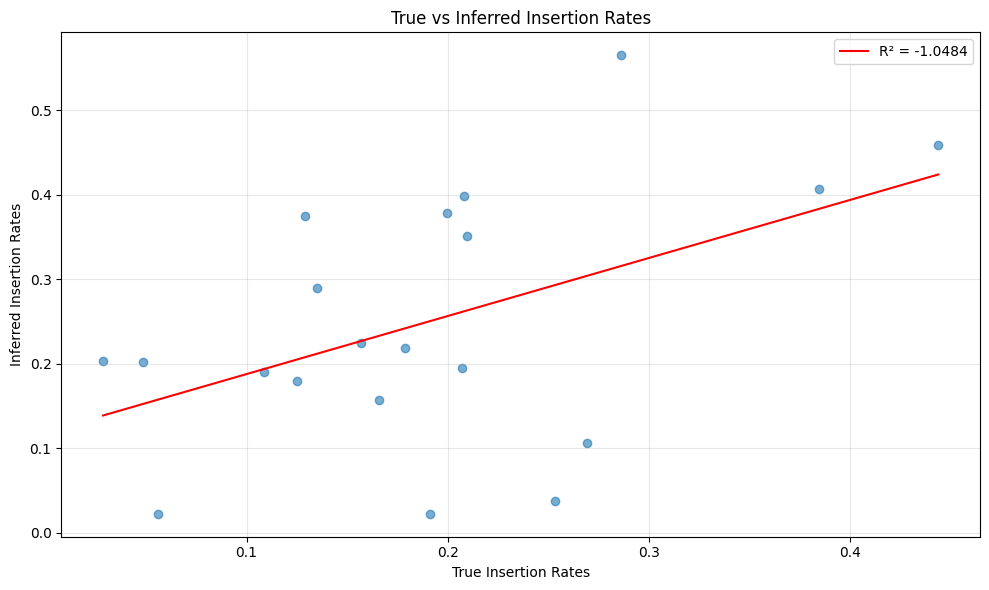

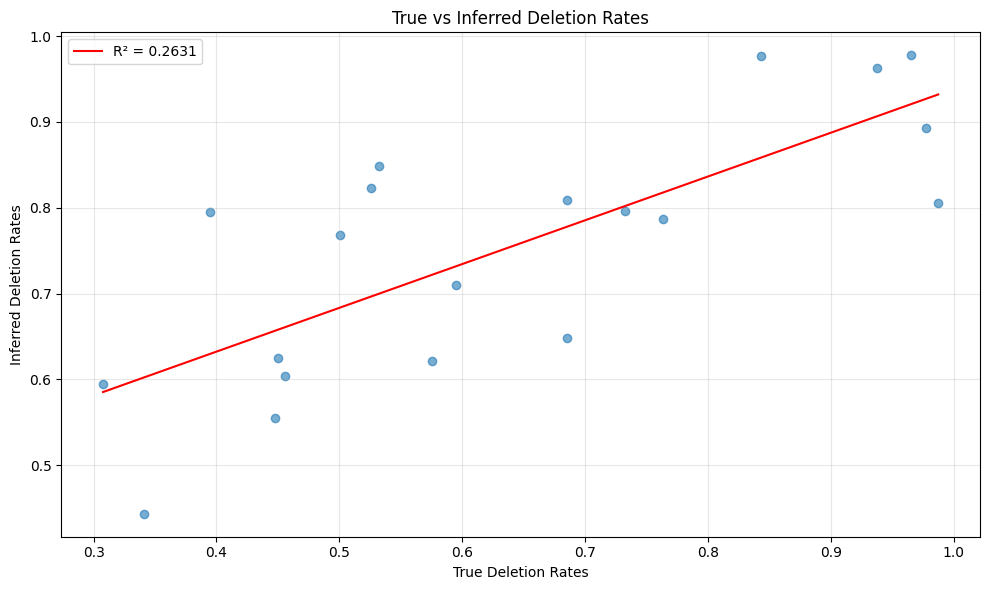

R² for Insertion Rates: -1.0484
R² for Deletion Rates: 0.2631


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# ... (previous code for simulation and inference)

# After running the simulation and inference
mutation_rates = model.get_mutation_rates()
true_insertion_rates = mutation_rates['insertion_rates']
true_deletion_rates = mutation_rates['deletion_rates']

inferred_insertion_rates = results['mu_i_mean']
inferred_deletion_rates = results['mu_d_mean']

# Function to create scatter plot with R² fitted line
def plot_rates(true_rates, inferred_rates, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.scatter(true_rates, inferred_rates, alpha=0.6)

    # Calculate R² and fit line
    r2 = r2_score(true_rates, inferred_rates)
    reg = LinearRegression().fit(true_rates.reshape(-1, 1), inferred_rates)

    # Plot fitted line
    x_range = np.linspace(min(true_rates), max(true_rates), 100)
    plt.plot(x_range, reg.predict(x_range.reshape(-1, 1)), color='red', label=f'R² = {r2:.4f}')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot insertion rates
plot_rates(true_insertion_rates, inferred_insertion_rates,
           "True vs Inferred Insertion Rates",
           "True Insertion Rates", "Inferred Insertion Rates")

# Plot deletion rates
plot_rates(true_deletion_rates, inferred_deletion_rates,
           "True vs Inferred Deletion Rates",
           "True Deletion Rates", "Inferred Deletion Rates")

# Print R² values
print(f"R² for Insertion Rates: {r2_score(true_insertion_rates, inferred_insertion_rates):.4f}")
print(f"R² for Deletion Rates: {r2_score(true_deletion_rates, inferred_deletion_rates):.4f}")


In [ ]:
!pip install theano

  Using cached Theano-1.0.5.tar.gz (2.8 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668112 sha256=a0e6150b903d23f22ae9b6f0f70cb1c8ae699bca1b8e230c979c42cf1d2ab793
  Stored in directory: /root/.cache/pip/wheels/26/1f/2f/02d738022626461828148150c0354e712c4ad74f1a60f10933
Successfully built theano


In [ ]:
!pip install numpyro

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.8/360.8 kB 17.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
from scipy.stats import multinomial, dirichlet
from tqdm import tqdm

class MicrosatelliteModel:
    def __init__(self, num_loci=1000, growth_rate=0.1,
                 mu_i=0.02, mu_d=0.03, sim_time=50):
        self.num_loci = num_loci
        self.growth_rate = growth_rate
        self.mu_i = mu_i
        self.mu_d = mu_d
        self.sim_time = sim_time

        # Initialize all loci at length 0
        self.loci_states = [{'lengths': [0], 'counts': [1]} for _ in range(num_loci)]

        # Adaptive time stepping
        self.delta_t = 0.01 / max(growth_rate, mu_i, mu_d)

    def simulate(self):
        time = 0
        while time < self.sim_time:
            self._step(time)
            time += self.delta_t
        return self._get_final_lengths()

    def _step(self, time):
        prev_cells = np.exp(self.growth_rate * (time - self.delta_t))
        curr_cells = np.exp(self.growth_rate * time)
        new_cells = int(curr_cells - prev_cells)

        for locus_idx in range(self.num_loci):
            self._update_locus(locus_idx, new_cells)

    def _update_locus(self, locus_idx, new_cells):
        state = self.loci_states[locus_idx]
        total = sum(state['counts'])
        probs = np.array(state['counts']) / total if total > 0 else np.zeros_like(state['counts'])

        # Assign new cells
        new_assign = multinomial.rvs(new_cells, probs)
        state['counts'] = [c + n for c, n in zip(state['counts'], new_assign)]

        # Process mutations using multinomial
        new_counts = []
        new_lengths = []
        for length, count in zip(state['lengths'], state['counts']):
            if count <= 0: continue

            # Mutation probabilities
            p_insert = min(self.mu_i * self.delta_t, 1)
            p_delete = min(self.mu_d * self.delta_t, 1)
            p_stay = 1 - p_insert - p_delete

            # Sample mutations
            outcomes = multinomial.rvs(count, [p_insert, p_delete, p_stay])
            ins, dels, stays = outcomes

            # Update states
            if stays > 0:
                new_counts.append(stays)
                new_lengths.append(length)
            if ins > 0:
                new_counts.append(ins)
                new_lengths.append(length + 1)
            if dels > 0:
                new_counts.append(dels)
                new_lengths.append(length - 1)

        # Update locus state
        state['lengths'] = new_lengths
        state['counts'] = new_counts

    def _get_final_lengths(self):
        return [np.average(state['lengths'], weights=state['counts'])
                for state in self.loci_states]

    def simulate_sequencing(self, coverage=100):
        observed = []
        for state in self.loci_states:
            counts = np.array(state['counts'])
            if len(counts) == 0:
                observed.append(0)
                continue

            # Dirichlet prior for noise
            alpha = dirichlet.rvs([1]*len(counts)).flatten()
            probs = (counts + alpha) / (sum(counts) + sum(alpha))
            observed_counts = multinomial.rvs(coverage, probs)
            observed_length = np.average(state['lengths'], weights=observed_counts)
            observed.append(observed_length)
        return observed
true_params = {'mu_i': 0.005, 'mu_d': 0.025, 'growth_rate': 0.1, 'sim_time': 50}
model = MicrosatelliteModel(**true_params)
true_lengths = model.simulate()
observed_data = model.simulate_sequencing()

In [ ]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import poisson, ks_2samp

x0 = true_lengths
x1 = observed_data



fig = go.Figure()
fig.add_trace(go.Box(y=x0))
fig.add_trace(go.Box(y=x1))




fig.update_layout(barmode='overlay')

fig.update_traces(opacity=0.75)
fig.show()

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))




fig.update_layout(barmode='overlay')

fig.update_traces(opacity=0.75)
fig.show()

# fig = go.Figure()
# fig.add_trace(go.Histogram(x=np.round(x2), nbinsx=100))

# fig.update_layout(barmode='overlay')

# fig.update_traces(opacity=0.75)
# fig.show()

In [ ]:
import torch
import numpy as np
from torch import distributions
from tqdm import tqdm
from scipy.stats import wasserstein_distance

class GPUMicrosatelliteModel:
    def __init__(self, num_loci=1000, growth_rate=0.1,
                 mu_i=0.02, mu_d=0.03, sim_time=50, device='cuda'):
        self.device = device
        self.num_loci = num_loci
        self.growth_rate = torch.tensor(growth_rate, device=device)
        self.mu_i = mu_i
        self.mu_d = mu_d
        self.sim_time = sim_time

        # Use integer counts for biological accuracy
        self.lengths = torch.zeros(num_loci, device=device, dtype=torch.int32)
        self.counts = torch.ones(num_loci, device=device, dtype=torch.int32)

        # Fixed time step for stability
        self.delta_t = 0.1  # Ensures mu*delta_t << 1
        self.p_insert = min(self.mu_i * self.delta_t, 0.1)
        self.p_delete = min(self.mu_d * self.delta_t, 0.1)
        self.p_stay = 1 - self.p_insert - self.p_delete

    def simulate(self):
        time = 0.0
        with torch.no_grad():
            while time < self.sim_time:
                # Exponential growth calculation
                prev_cells = torch.exp(self.growth_rate * (time - self.delta_t))
                curr_cells = torch.exp(self.growth_rate * time)
                new_cells = int((curr_cells - prev_cells).item())

                if new_cells > 0:
                    # Multinomial sampling with proper normalization
                    probs = self.counts.float() / self.counts.sum()
                    new_assign = torch.multinomial(probs, new_cells, replacement=True)
                    unique, counts = torch.unique(new_assign, return_counts=True)
                    self.counts[unique] += counts

                # Correct mutation sampling using categorical distribution
                mutation_probs = torch.tensor(
                    [self.p_insert, self.p_delete, self.p_stay],
                    device=self.device
                )
                choices = torch.distributions.Categorical(mutation_probs).sample((self.num_loci,))

                # Apply mutations using integer arithmetic
                self.lengths += (choices == 0).int() - (choices == 1).int()

                time += self.delta_t

        return self.lengths.float().cpu().numpy()

class ABCInferencer:
    def __init__(self, observed_data, prior_ranges, n_particles=500):
        self.observed = observed_data
        self.priors = {
            'mu_i': distributions.Uniform(*prior_ranges['mu_i']),
            'mu_d': distributions.Uniform(*prior_ranges['mu_d'])
        }
        self.n_particles = n_particles
        self.particles = None
        self.weights = None

    def wasserstein_similarity(self, sim_data):
        return wasserstein_distance(self.observed, sim_data)

    def initialize_particles(self):
        return [{
            'mu_i': self.priors['mu_i'].sample().item(),
            'mu_d': self.priors['mu_d'].sample().item()
        } for _ in range(self.n_particles)]

    def run_smc(self, n_iter=15, eps_decay=0.9, verbose=True):
        particles = self.initialize_particles()
        eps = np.inf
        weights = np.ones(self.n_particles) / self.n_particles

        for iter in range(n_iter):
            valid = []
            distances = []

            for params in tqdm(particles):
                try:
                    model = GPUMicrosatelliteModel(**params)
                    sim_data = model.simulate()
                    dist = self.wasserstein_similarity(sim_data)

                    if dist < eps:
                        valid.append(params)
                        distances.append(dist)
                except:
                    continue

            # Adaptive epsilon with smoother decay
            if len(valid) < 10:
                eps *= 1.2
                particles = self.initialize_particles()
                if verbose: print(f"Reset particles at iteration {iter+1}")
                continue

            eps = np.percentile(distances, 50) * eps_decay  # More conservative
            weights = np.exp(-np.array(distances)/eps)  # Exponential kernel
            weights /= weights.sum()

            # Resample with jitter
            resample_idx = np.random.choice(range(len(valid)), size=self.n_particles, p=weights)
            new_particles = [valid[i] for i in resample_idx]

            # Add Gaussian noise to prevent collapse
            particles = [{
                'mu_i': max(0.001, p['mu_i'] + np.random.normal(0, 0.005)),
                'mu_d': max(0.001, p['mu_d'] + np.random.normal(0, 0.005))
            } for p in new_particles]

            if verbose:
                print(f"Iter {iter+1}: ε={eps:.4f}, Survived {len(valid)}")
                print(f"μ_i: {np.mean([p['mu_i'] for p in particles]):.5f} ± {np.std([p['mu_i'] for p in particles]):.5f}")
                print(f"μ_d: {np.mean([p['mu_d'] for p in particles]):.5f} ± {np.std([p['mu_d'] for p in particles]):.5f}\n")

        self.particles = particles
        return particles

# Validation Example
if __name__ == "__main__":
    # Generate validation data
    true_params = {'mu_i': 0.015, 'mu_d': 0.085, 'growth_rate': 0.244, 'sim_time': 35}
    model = GPUMicrosatelliteModel(**true_params)
    observed_data = model.simulate()

    # Set up ABC inference
    prior_ranges = {
      'mu_i': (0.001, 0.05),  # More informed prior
      'mu_d': (0.01, 0.1)
  }

    inferencer = ABCInferencer(observed_data, prior_ranges, n_particles=1000)
    results = inferencer.run_smc(n_iter=10)

    # Analyze results
    mu_i_est = np.mean([p['mu_i'] for p in results])
    mu_d_est = np.mean([p['mu_d'] for p in results])
    print(f"\nTrue parameters: mu_i={true_params['mu_i']}, mu_d={true_params['mu_d']}")
    print(f"Estimated parameters: mu_i={mu_i_est:.5f}, mu_d={mu_d_est:.5f}")


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
import pandas as pd
df = pd.read_table("/content/normalized_MSI_data.txt",index_col=0)
df

,CRC0282_CENPE,CRC0282_CENPE_1_D10,CRC0282_CENPE_1_D15,CRC0282_CENPE_1_D2,CRC0282_CENPE_2_D10,CRC0282_CENPE_2_D15,CRC0282_CENPE_2_D2,CRC0282_CENPE_3_D10,CRC0282_CENPE_3_D15,CRC0282_CENPE_3_D2,...,CRC0282_OXA1_CM2,CRC0282_OXA1_CM3,CRC0282_OXA1_P1,CRC0282_OXA1_P2,CRC0282_OXA1_P3,CRC0282_OXA2_CM1,CRC0282_OXA2_CM2,CRC0282_OXA2_P2,CRC0282_OXA2_P3,CRC0282_Parental
Mutation Types,,,,,,,,,,,,,,,,,,,,,
1:Del:C:0,2184.318445,3156.726698,2608.382048,2960.976312,2314.049587,2325.506282,2090.282959,2794.017394,2002.143502,2957.151813,...,2952.685708,2987.757064,3036.456729,3295.230294,3131.613567,3054.655702,2406.527930,3130.541177,2885.789118,701.568290
1:Del:C:1,6277.726207,6504.770165,4747.087586,6407.948736,4341.181974,4715.609961,5197.960278,6027.020885,4793.321733,6374.798187,...,7826.281280,6988.604168,6525.254081,6720.780430,6356.174570,6076.086054,5306.245534,6657.776886,6067.860487,1752.242333
1:Del:C:2,4864.049321,3552.114688,2205.802182,3140.974872,2145.641665,2002.519298,2244.433620,2819.840106,2086.958310,3278.943193,...,3304.535534,2941.967684,3219.317832,3593.104219,3310.358634,3062.962040,2528.339837,3503.338447,3336.138139,862.694022
1:Del:C:3,2462.049656,1626.192541,1258.062081,1349.989200,1016.684859,1085.236265,931.069991,1291.135580,1025.488135,1359.291171,...,1473.965490,1413.747117,1669.810594,1563.838106,1358.462506,1297.865271,1112.647790,1429.056202,1392.526577,436.382190
1:Del:C:4,2104.251790,1249.936228,1107.094631,1025.991792,1079.058163,936.662253,1079.054625,945.111244,986.935949,1148.462337,...,1017.511661,1087.497782,1154.912227,1085.998684,1101.069610,1054.904892,937.357484,1061.038384,1202.905936,339.035394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5:Del:M:1,888.239459,1843.018213,1601.932383,1682.986536,1521.908623,1466.360906,1732.653426,1755.944388,1457.272613,1742.111950,...,1550.041128,1654.141363,1852.671697,1948.591925,1687.353429,1590.663676,1479.569024,1500.747984,1653.254957,503.517912
5:Del:M:2,337.781203,554.818632,545.160235,665.994672,611.258381,555.537612,561.108405,531.947859,524.309723,704.612158,...,717.963836,572.367254,476.401294,589.542143,636.332437,610.515824,522.899896,568.754809,604.415791,194.693593
5:Del:M:3,385.320780,624.968114,662.579363,755.993952,598.783721,594.296050,715.259066,790.174975,560.291763,621.390250,...,584.831469,492.235838,630.389590,701.244865,700.680661,600.132901,533.298473,611.769879,568.861921,181.266448


In [ ]:
test = df[['CRC0282_Parental', 'CRC0282_OXA1_P1']]
# test = np.round(test * 100/ test.sum(axis=0))
test['Change'] = test['CRC0282_OXA1_P1'] - test['CRC0282_Parental']

<ipython-input-111-08877620345c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Change'] = test['CRC0282_OXA1_P1'] - test['CRC0282_Parental']


In [ ]:
# test = test / test.sum(axis=0)
test['Change'] = test['Change'] / test['Change'].sum() * 1000
test

<ipython-input-114-285a238e9b3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Change'] = test['Change'] / test['Change'].sum() * 1000


,CRC0282_Parental,CRC0282_OXA1_P1,Change
Mutation Types,,,
1:Del:C:0,701.568290,3036.456729,8.150069
1:Del:C:1,1752.242333,6525.254081,16.660486
1:Del:C:2,862.694022,3219.317832,8.225938
1:Del:C:3,436.382190,1669.810594,4.305356
1:Del:C:4,339.035394,1154.912227,2.847867
...,...,...,...
5:Del:M:1,503.517912,1852.671697,4.709303
5:Del:M:2,194.693593,476.401294,0.983318
5:Del:M:3,181.266448,630.389590,1.567691


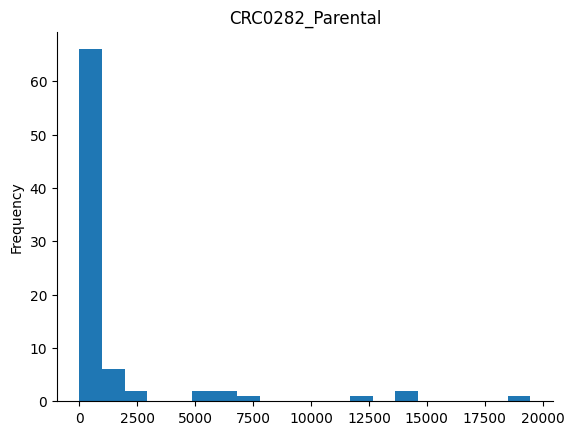

In [ ]:
from matplotlib import pyplot as plt
test['CRC0282_Parental'].plot(kind='hist', bins=20, title='CRC0282_Parental')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
y=[]
for i in range(len(test)):
  if test.index[i].split(":")[1] == "Del":
    for j in range(int(test['Change'][test.index[i]])):
      y.append(-int(test.index[i].split(":")[0]))
  elif test.index[i].split(":")[1] == "Ins":
    for j in range(int(test['Change'][test.index[i]])):
      y.append(int(test.index[i].split(":")[0]))
  elif test.index[i].split(":")[2] == "M":
    continue

In [ ]:
pd.DataFrame(y)

,0
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
959,-5
960,-5
961,-5
962,-5


from matplotlib import pyplot as plt
_df_8[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

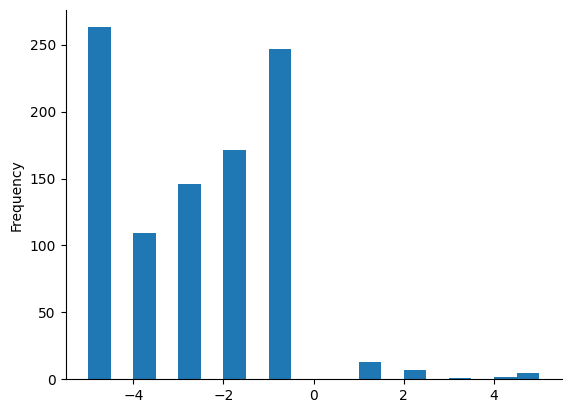

In [ ]:
from matplotlib import pyplot as plt
_df_8[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# pd.DataFrame(y)
# true_params = {'mu_i': 0.005, 'mu_d': 0.025, 'growth_rate': 0.1, 'sim_time': 50}
# model = GPUMicrosatelliteModel(**true_params)
observed_data = y

# Set up ABC inference
prior_ranges = {
    'mu_i': (0.0001, 1),
    'mu_d': (0.05, 1)
}

inferencer = ABCInferencer(observed_data, prior_ranges, n_particles=300)
results = inferencer.run_smc(n_iter=7)


# Analyze results
mu_i_est = np.mean([p['mu_i'] for p in results])
mu_d_est = np.mean([p['mu_d'] for p in results])
print(f"\nTrue parameters: mu_i={true_params['mu_i']}, mu_d={true_params['mu_d']}")
print(f"Estimated parameters: mu_i={mu_i_est:.5f}, mu_d={mu_d_est:.5f}")


100%|██████████| 300/300 [03:53<00:00,  1.28it/s]


Iteration 1: Epsilon=333.6456, Survived 300 particles
Current estimates: mu_i=0.4843 ± 0.2729, mu_d=0.5011 ± 0.2649


100%|██████████| 300/300 [03:13<00:00,  1.55it/s]


Iteration 2: Epsilon=36.6257, Survived 205 particles
Current estimates: mu_i=0.3767 ± 0.2332, mu_d=0.3728 ± 0.2322


100%|██████████| 300/300 [02:26<00:00,  2.05it/s]


Iteration 3: Epsilon=17.3768, Survived 104 particles
Current estimates: mu_i=0.1845 ± 0.0591, mu_d=0.1851 ± 0.0601


100%|██████████| 300/300 [01:35<00:00,  3.15it/s]


Iteration 4: No particles survived, relaxing epsilon


100%|██████████| 300/300 [01:35<00:00,  3.15it/s]


Iteration 5: Epsilon=17.5193, Survived 300 particles
Current estimates: mu_i=0.1774 ± 0.0585, mu_d=0.1779 ± 0.0596


100%|██████████| 300/300 [01:36<00:00,  3.11it/s]


Iteration 6: No particles survived, relaxing epsilon


100%|██████████| 300/300 [01:35<00:00,  3.13it/s]

Iteration 7: Epsilon=17.3919, Survived 300 particles
Current estimates: mu_i=0.1731 ± 0.0578, mu_d=0.1735 ± 0.0588

True parameters: mu_i=0.015, mu_d=0.085
Estimated parameters: mu_i=0.17307, mu_d=0.17346


In [ ]:
import pandas as pd
df = pd.read_table("/content/denovo_indels_43genes.txt")
ms_loci = pd.read_csv("MS Loci.csv")

<ipython-input-72-ae5f9994e0e5>:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
ms_loci.columns

Index(['Chrom', 'Start', 'End'], dtype='object')

In [ ]:
df2 = df[df['Ko_gene'] == "MSH6"]
df2 = df2[df2['Sample'] == "MSK0.3_s6"]


,Sample,Ko_gene,VariantID,Chrom,Pos,Ref,Alt,Sample_ko,Genotype
19319,MSK0.3_s6,MSH6,e27f5466-d868-11e6-ac89-3cbe96c0e259,6,55900707,AT,A,MSH6_3_s6,MSH6_3
19320,MSK0.3_s6,MSH6,f2b0a268-d868-11e6-ac89-3cbe96c0e259,6,58474626,CT,C,MSH6_3_s6,MSH6_3
19321,MSK0.3_s6,MSH6,ffaa8268-d868-11e6-ac89-3cbe96c0e259,6,64682072,CT,C,MSH6_3_s6,MSH6_3
19322,MSK0.3_s6,MSH6,02948186-d869-11e6-ac89-3cbe96c0e259,6,65262629,AC,A,MSH6_3_s6,MSH6_3
19323,MSK0.3_s6,MSH6,05f954aa-d869-11e6-ac89-3cbe96c0e259,6,65952743,AT,A,MSH6_3_s6,MSH6_3
...,...,...,...,...,...,...,...,...,...
20261,MSK0.3_s6,MSH6,485e143a-d868-11e6-843c-7c2c9d8a526a,9,100754369,CT,C,MSH6_3_s6,MSH6_3
20262,MSK0.3_s6,MSH6,5df39fe0-d868-11e6-843c-7c2c9d8a526a,9,107153208,CA,C,MSH6_3_s6,MSH6_3
20263,MSK0.3_s6,MSH6,686b443c-d868-11e6-843c-7c2c9d8a526a,9,110490864,CT,C,MSH6_3_s6,MSH6_3
20264,MSK0.3_s6,MSH6,b0047d62-d869-11e6-843c-7c2c9d8a526a,9,83970019,T,TA,MSH6_3_s6,MSH6_3


In [ ]:
import pandas as pd
import bisect

# Example DataFrames
df1 = ms_loci.copy()

# Sort the dataframes by chrom and start (for df1) and chrom and position (for df2)
df1_sorted = df1.sort_values(by=['Chrom', 'Start']).reset_index(drop=True)
df2_sorted = df.sort_values(by=['Chrom', 'Pos']).reset_index(drop=True)

# Prepare to store the results
df2_sorted['Start'] = None
df2_sorted['End'] = None

# Function to find the corresponding start and end for each position using binary search
def assign_start_end(row):
    chrom = row['Chrom']
    position = row['Pos']

    # Filter the rows in df1 that match the chrom
    chrom_df1 = df1_sorted[df1_sorted['Chrom'] == chrom]

    # Perform binary search on the start positions to find the corresponding range
    start_positions = chrom_df1['Start'].values
    idx = bisect.bisect_right(start_positions, position) - 1

    if idx >= 0 and chrom_df1.iloc[idx]['Start'] <= position <= chrom_df1.iloc[idx]['End']:
        return pd.Series({
            'Start': chrom_df1.iloc[idx]['Start'],
            'End': chrom_df1.iloc[idx]['End']
        })
    else:
        return pd.Series({'Start': None, 'End': None})

# Apply the function to df2_sorted
result = df2_sorted.apply(assign_start_end, axis=1)

print(result)

       Start  End
0        NaN  NaN
1        NaN  NaN
2        NaN  NaN
3        NaN  NaN
4        NaN  NaN
...      ...  ...
24834    NaN  NaN
24835    NaN  NaN
24836    NaN  NaN
24837    NaN  NaN
24838    NaN  NaN

[24839 rows x 2 columns]


In [ ]:
import pandas as pd
import numpy as np
# df2_sorted.to_csv("KO_Microsatellite_Range.txt",sep="\t")
df2_sorted = pd.read_table("/content/KO_Microsatellite_Range.txt")

In [ ]:
df2_sorted.dropna()['Ko_gene'].value_counts()

,count
Ko_gene,
MSH6,14
PMS2,14
MSH2,11
MLH1,10
PIF1,1


In [ ]:
target_sample = df2_sorted[df2_sorted['Ko_gene']=="MLH1"].dropna()
target_sample['Initial_Lengths'] = target_sample['End'] - target_sample['Start']
fl=[]
for i in range(len(target_sample)):
  if len(target_sample['Ref'] > target_sample['Alt']):
    fl.append(target_sample['Initial_Lengths'].values[i] - len(target_sample['Ref']) + 1)
  elif len(target_sample['Ref'] <= target_sample['Alt']):
    fl.append(target_sample['Initial_Lengths'].values[i]  + len(target_sample['Alt']) - 1)

In [ ]:
target_sample['Final_Lengths'] = fl
target_sample.reset_index(drop=True,inplace=True)

In [ ]:
target_sample

,Unnamed: 0,Sample,Ko_gene,VariantID,Chrom,Pos,Ref,Alt,Sample_ko,Genotype,Start,End,Initial_Lengths,Final_Lengths
0,20884,MSK0.173_s2,MLH1,1569405a-3ee5-11e9-a934-7de86a22a421,7,3005029,CA,C,MLH1_173_s2,MLH1_173,3004668.0,3005134.0,466.0,457.0
1,21370,MSK0.172_s1,MLH1,b601dacc-3eea-11e9-9764-4e31686e2c3d,7,53503024,A,AT,MLH1_172_s1,MLH1_172,53502915.0,53503347.0,432.0,423.0
2,21640,MSK0.173_s1,MLH1,d01bdaea-3eed-11e9-8b02-91965380a763,7,84490206,G,GT,MLH1_173_s1,MLH1_173,84490200.0,84490219.0,19.0,10.0
3,21808,MSK0.172_s1,MLH1,9e2e15ca-3ee8-11e9-9764-4e31686e2c3d,7,100531018,GT,G,MLH1_172_s1,MLH1_172,100530981.0,100531029.0,48.0,39.0
4,22076,MSK0.172_s1,MLH1,110716dc-3ee9-11e9-9764-4e31686e2c3d,7,126924658,AT,A,MLH1_172_s1,MLH1_172,126924566.0,126924659.0,93.0,84.0
5,22904,MSK0.172_s1,MLH1,b0fde878-3ee9-11e9-82ed-e60756023932,8,64189523,C,CT,MLH1_172_s1,MLH1_172,64189517.0,64189586.0,69.0,60.0
6,23429,MSK0.172_s1,MLH1,3e54400a-3eea-11e9-82ed-e60756023932,8,118728064,A,AT,MLH1_172_s1,MLH1_172,118728064.0,118728081.0,17.0,8.0
7,23525,MSK0.172_s2,MLH1,bd99336a-3efa-11e9-86bc-a7f1774de844,8,130236334,AT,A,MLH1_172_s2,MLH1_172,130236318.0,130236354.0,36.0,27.0
8,24348,MSK0.172_s1,MLH1,1c19901a-3ee7-11e9-8d90-8b2e686e2c3d,9,108740541,CT,C,MLH1_172_s1,MLH1_172,108740511.0,108740546.0,35.0,26.0
9,24533,MSK0.172_s1,MLH1,7239b920-3ee7-11e9-8d90-8b2e686e2c3d,9,130628079,AC,A,MLH1_172_s1,MLH1_172,130628061.0,130628127.0,66.0,57.0


In [ ]:
# inference = MicrosatelliteInference(initial_lengths, final_lengths, growth_rate, sim_time, num_loci)
inference = MicrosatelliteInference(np.array(target_sample['Initial_Lengths']), np.array(target_sample['Final_Lengths']), 0.678, 15, len(target_sample))
trace = inference.infer()
results = inference.summarize_results(trace)


Output()

Output()

In [ ]:
results

{'mu_i_mean': array([0.20618152, 0.20574246, 0.20162432, 0.20483063, 0.20435056,
        0.20489606, 0.20539078, 0.20551688, 0.20818601, 0.20839314]),
 'mu_i_std': array([0.12560522, 0.12629088, 0.12292455, 0.1249593 , 0.12493734,
        0.12575162, 0.12599025, 0.12418377, 0.12394253, 0.12780676]),
 'mu_d_mean': array([0.79250358, 0.79446844, 0.79104217, 0.7922523 , 0.79302145,
        0.79213268, 0.79335232, 0.79442898, 0.79520763, 0.79412411]),
 'mu_d_std': array([0.12514202, 0.12676173, 0.12221313, 0.12452437, 0.12537316,
        0.1259651 , 0.12602459, 0.1244038 , 0.12353083, 0.12783533])}

In [ ]:
results_MLH1 = results

In [ ]:
pd.DataFrame.from_dict(results_MLH1).to_csv("MLH1_Inference.csv")

In [ ]:
All_Genes_Inference = pd.concat([pd.DataFrame.from_dict(results_MLH1), pd.DataFrame.from_dict(results_MSH2), pd.DataFrame.from_dict(results_MSH6), pd.DataFrame.from_dict(results_PMS2)])
All_Genes_Inference.reset_index(drop=True, inplace=False)


,mu_i_mean,mu_i_std,mu_d_mean,mu_d_std
0,0.206182,0.125605,0.792504,0.125142
1,0.205742,0.126291,0.794468,0.126762
2,0.201624,0.122925,0.791042,0.122213
3,0.204831,0.124959,0.792252,0.124524
4,0.204351,0.124937,0.793021,0.125373
5,0.204896,0.125752,0.792133,0.125965
6,0.205391,0.125990,0.793352,0.126025
7,0.205517,0.124184,0.794429,0.124404
8,0.208186,0.123943,0.795208,0.123531
9,0.208393,0.127807,0.794124,0.127835


In [ ]:
All_Genes_Inference.to_csv("All_Genes_Inference.txt", sep="\t")

In [ ]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import poisson, ks_2samp

fig = go.Figure()
fig.add_trace(go.Box(y=results_MLH1['mu_d_mean'], name="MLH1"))
fig.add_trace(go.Box(y=results_MSH2['mu_d_mean'], name="MSH2"))
fig.add_trace(go.Box(y=results_MSH6['mu_d_mean'], name="MSH6"))
fig.add_trace(go.Box(y=results_PMS2['mu_d_mean'], name="PMS2"))

fig.update_layout(barmode='overlay')

fig.update_traces(opacity=0.75)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(y=results_MLH1['mu_i_mean'], name="MLH1"))
fig.add_trace(go.Box(y=results_MSH2['mu_i_mean'], name="MSH2"))
fig.add_trace(go.Box(y=results_MSH6['mu_i_mean'], name="MSH6"))
fig.add_trace(go.Box(y=results_PMS2['mu_i_mean'], name="PMS2"))





fig.update_layout(barmode='overlay')

fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
PCAWG_All = pd.read_table("/content/PCAWG_All (1).txt")
PCAWG_All = PCAWG_All[PCAWG_All['effect'].str.contains("Frame_Shift")]

In [ ]:
target_sample = PCAWG_All[PCAWG_All['Sample'] == "SP84384"].reset_index(drop=True)
target_sample.rename({'start':'Pos', 'chr':'Chrom'}, axis=1, inplace=True)

In [ ]:
microsats = pd.read_table("/content/microsat (1).txt", header=None, names=['Bin','Chrom','Start','End','Comp'])
microsats['Chrom'] = microsats['Chrom'].str.replace("chr", '', regex=False)
microsats = microsats[(microsats['Chrom']!='X') & (microsats['Chrom']!='Y')]
microsats = microsats[~((microsats['Chrom'].str.contains("Un_g")) | (microsats['Chrom'].str.contains("9_gl")))]
microsats

,Bin,Chrom,Start,End,Comp
0,585,1,50481,50513,16xGT
1,586,1,144527,144576,24xTA
2,588,1,404661,404707,23xGT
3,588,1,422395,422435,20xAC
4,589,1,562161,562201,20xGT
...,...,...,...,...,...
38639,1651,9,139812679,139812710,15xTA
38640,1652,9,139861278,139861325,23xTC
38641,1652,9,139861324,139861369,22xTA
38642,1656,9,140495661,140495712,25xTA


In [ ]:
import pandas as pd
import bisect

# Example DataFrames
df1 = microsats.copy()

# Sort the dataframes by chrom and start (for df1) and chrom and position (for df2)
df1_sorted = df1.sort_values(by=['Chrom', 'Start']).reset_index(drop=True)
df2_sorted = target_sample.sort_values(by=['Chrom', 'Pos']).reset_index(drop=True)

# Prepare to store the results
df2_sorted['Start'] = None
df2_sorted['End'] = None

# Function to find the corresponding start and end for each position using binary search
def assign_start_end(row):
    chrom = row['Chrom']
    position = row['Pos']

    # Filter the rows in df1 that match the chrom
    chrom_df1 = df1_sorted[df1_sorted['Chrom'] == chrom]

    # Perform binary search on the start positions to find the corresponding range
    start_positions = chrom_df1['Start'].values
    idx = bisect.bisect_right(start_positions, position) - 1

    if idx >= 0 and chrom_df1.iloc[idx]['Start'] <= position <= chrom_df1.iloc[idx]['End']:
        return pd.Series({
            'Start': chrom_df1.iloc[idx]['Start'],
            'End': chrom_df1.iloc[idx]['End']
        })
    else:
        return pd.Series({'Start': None, 'End': None})

# Apply the function to df2_sorted
result = df2_sorted.apply(assign_start_end, axis=1)

print(result)

    Start   End
0    None  None
1    None  None
2    None  None
3    None  None
4    None  None
..    ...   ...
543  None  None
544  None  None
545  None  None
546  None  None
547  None  None

[548 rows x 2 columns]
